# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Caution**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Dandiset Overview

This notebook explores Dandiset 000690, which contains data from the Allen Institute Openscope - Vision2Hippocampus project. This project aims to understand how visual representations evolve from the LGN through visual cortex and into hippocampal regions in mice. The data includes Neuropixels extracellular electrophysiology from various brain regions while mice were presented with simple and complex visual stimuli.

You can find more information about this Dandiset on the DANDI Archive: https://dandiarchive.org/dandiset/000690/0.250326.0015

## Notebook Contents

This notebook will cover:

*   Connecting to the DANDI archive and loading the Dandiset metadata.
*   Loading a specific NWB file from the Dandiset.
*   Examining the structure and contents of the NWB file.
*   Loading and visualizing samples of the Eye Tracking and Running Wheel data.
*   Summarizing the findings and suggesting future analysis directions.

## Required Packages

To run this notebook, you need the following Python packages installed:

*   `dandi`
*   `pynwb`
*   `remfile`
*   `h5py`
*   `numpy`
*   `pandas`
*   `matplotlib`
*   `seaborn`

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Loading an NWB file

We will load the NWB file `sub-692072/sub-692072_ses-1298465622.nwb` to explore its contents. This file has the asset ID `fbcd4fe5-7107-41b2-b154-b67f783f23dc`.

The URL for this asset is: https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/

In [2]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Show some basic metadata from the NWB file
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject Species: {nwb.subject.species}")
print(f"Subject Genotype: {nwb.subject.genotype}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session Description: Data and metadata for an Ecephys session
Identifier: 1298465622
Session Start Time: 2023-09-21 00:00:00-07:00
Subject ID: 692072
Subject Species: Mus musculus
Subject Genotype: wt/wt


## NWB File Contents

The chosen NWB file contains various types of data related to the experimental session:

*   **Acquisition**: Raw data acquired during the experiment. This includes Eye Tracking data (corneal_reflection_tracking, eye_tracking, pupil_tracking, likely_blink) and raw running wheel rotation/voltage data.
*   **Processing**: Processed data derived from the raw acquisition data. This includes processed running wheel speed and rotation. Stimulus timing information is also stored here.
*   **Electrodes**: Metadata about the extracellular electrodes used in the experiment, including location and grouping.
*   **Devices**: Information about the recording devices (Neuropixels probes).
*   **Intervals**: Time intervals corresponding to different experimental phases or stimulus presentations.
*   **Subject**: Metadata about the experimental subject (mouse).
*   **Units**: Spike times, amplitudes, and waveforms for identified units (neurons). This table also includes various quality metrics for the units.

Here's a simplified view of the NWB file structure:

```
NWBFile
├── acquisition
│   ├── EyeTracking (EllipseEyeTracking)
│   │   ├── corneal_reflection_tracking (EllipseSeries)
│   │   ├── eye_tracking (EllipseSeries)
│   │   ├── likely_blink (TimeSeries)
│   │   └── pupil_tracking (EllipseSeries)
│   ├── raw_running_wheel_rotation (TimeSeries)
│   ├── running_wheel_signal_voltage (TimeSeries)
│   └── running_wheel_supply_voltage (TimeSeries)
├── processing
│   ├── running (ProcessingModule)
│   │   ├── running_speed (TimeSeries)
│   │   ├── running_speed_end_times (TimeSeries)
│   │   └── running_wheel_rotation (TimeSeries)
│   └── stimulus (ProcessingModule)
│       └── timestamps (TimeSeries)
├── electrode_groups (LabelledDict)
├── devices (LabelledDict)
├── intervals (LabelledDict)
├── electrodes (DynamicTable)
├── subject (EcephysSpecimen)
├── invalid_times (TimeIntervals)
└── units (Units)
```

You can explore this NWB file directly in neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft

## Exploring Eye Tracking Data

The `EyeTracking` module in the `acquisition` group contains data related to the subject's eye movements. This includes tracking of the pupil, corneal reflection, and the entire eye. There is also a timeseries indicating whether a blink is likely.

Shape of pupil_position (subset): (10000, 2)
Shape of pupil_area (subset): (10000,)
Shape of timestamps_eye (subset): (10000,)


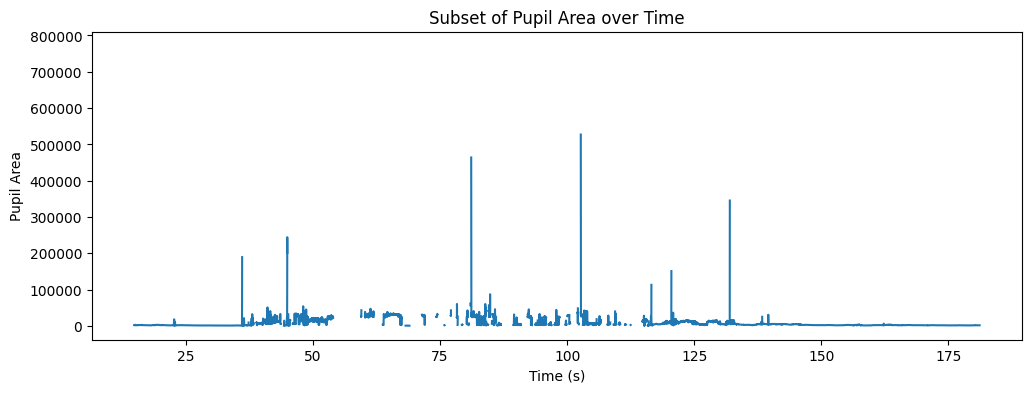

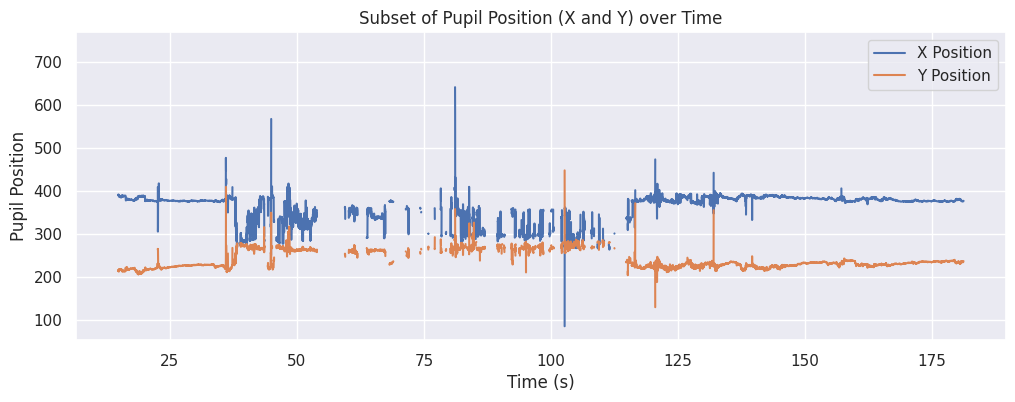

Shape of likely_blink (subset): (10000,)
Shape of timestamps_blink (subset): (10000,)


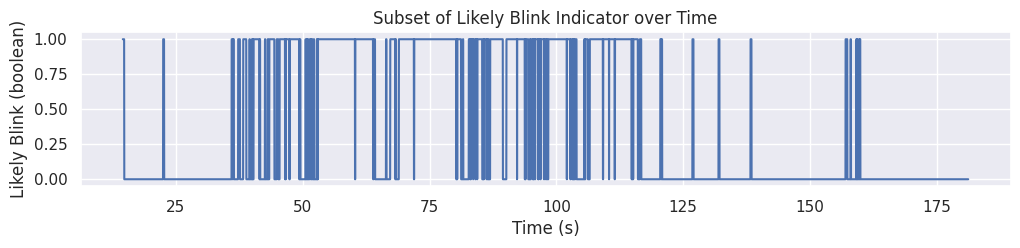

In [3]:
# Access the EyeTracking data
eye_tracking_module = nwb.acquisition['EyeTracking']

# Get the data for pupil tracking position, area, and timestamps (subset)
N_POINTS_TO_PLOT = 10000
pupil_position = eye_tracking_module['pupil_tracking'].data[:N_POINTS_TO_PLOT, :]
pupil_area = eye_tracking_module['pupil_tracking'].area[:N_POINTS_TO_PLOT]
timestamps_eye = eye_tracking_module['pupil_tracking'].timestamps[:N_POINTS_TO_PLOT] # Load only subset of timestamps

# Print shapes of the data subsets
print(f"Shape of pupil_position (subset): {pupil_position.shape}")
print(f"Shape of pupil_area (subset): {pupil_area.shape}")
print(f"Shape of timestamps_eye (subset): {timestamps_eye.shape}")

# Plot the subset of the pupil area data
plt.figure(figsize=(12, 4))
plt.plot(timestamps_eye, pupil_area)
plt.xlabel('Time (s)')
plt.ylabel('Pupil Area')
plt.title('Subset of Pupil Area over Time')
sns.set_theme() # Apply seaborn style
plt.show()

# Plot the subset of the pupil position data (x and y)
plt.figure(figsize=(12, 4))
plt.plot(timestamps_eye, pupil_position[:, 0], label='X Position')
plt.plot(timestamps_eye, pupil_position[:, 1], label='Y Position')
plt.xlabel('Time (s)')
plt.ylabel('Pupil Position')
plt.title('Subset of Pupil Position (X and Y) over Time')
sns.set_theme() # Apply seaborn style
plt.legend()
plt.show()

# Access the likely_blink data (subset) and timestamps (subset)
likely_blink = eye_tracking_module.likely_blink.data[:N_POINTS_TO_PLOT] # Load only subset of data
timestamps_blink = eye_tracking_module.likely_blink.timestamps[:N_POINTS_TO_PLOT] # Load only subset of timestamps

# Print shape of likely_blink data subset
print(f"Shape of likely_blink (subset): {likely_blink.shape}")
print(f"Shape of timestamps_blink (subset): {timestamps_blink.shape}")

# Plot the subset of the likely_blink data
plt.figure(figsize=(12, 2))
plt.plot(timestamps_blink, likely_blink)
plt.xlabel('Time (s)')
plt.ylabel('Likely Blink (boolean)')
plt.title('Subset of Likely Blink Indicator over Time')
sns.set_theme() # Apply seaborn style
plt.show()

## Exploring Running Wheel Data

The processed running speed is available in the `running` processing module.

Shape of running_speed (subset): (10000,)
Shape of timestamps_running (subset): (10000,)


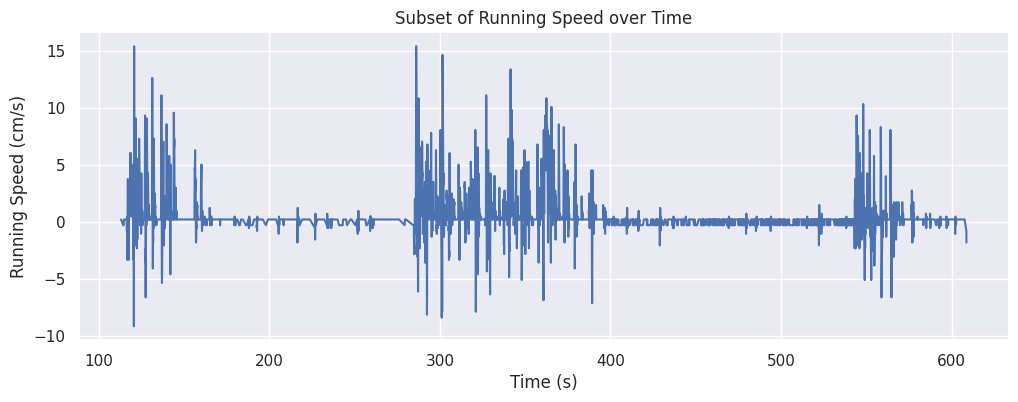

In [4]:
# Access the running data
running_module = nwb.processing['running']

# Get the running speed data (subset) and timestamps (subset)
N_POINTS_TO_PLOT_RUNNING = 10000 # Using a different variable name just in case
running_speed = running_module['running_speed'].data[:N_POINTS_TO_PLOT_RUNNING]
timestamps_running = running_module['running_speed'].timestamps[:N_POINTS_TO_PLOT_RUNNING] # load subset of timestamps

# Print shape of running speed data subset
print(f"Shape of running_speed (subset): {running_speed.shape}")
print(f"Shape of timestamps_running (subset): {timestamps_running.shape}")

# Plot the subset of the running speed data
plt.figure(figsize=(12, 4))
plt.plot(timestamps_running, running_speed)
plt.xlabel('Time (s)')
plt.ylabel('Running Speed (cm/s)')
plt.title('Subset of Running Speed over Time')
sns.set_theme() # Apply seaborn style
plt.show()

## Exploring Stimulus Presentation Intervals

The `intervals` section contains tables describing the presentation times and properties of different stimuli. We can load these tables into pandas DataFrames for easier analysis.

In [5]:
# List available stimulus interval tables
print("Available stimulus interval tables:")
for interval_name in nwb.intervals:
    if interval_name.endswith('_presentations'):
        print(f"- {interval_name}")

# Load one of the stimulus presentation tables and display the first few rows
try:
    # Display the first 5 rows of the dataframe without loading the entire table
    print("\nFirst 5 rows of 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations' table:")
    # Accessing a slice and then converting to dataframe should be faster
    stimulus_presentations_slice = nwb.intervals['SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations'][0:5]
    stimulus_presentations_df_head = pd.DataFrame(stimulus_presentations_slice.to_dict()) # Convert to dict then DataFrame
    print(stimulus_presentations_df_head)
except KeyError:
    print("\n'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations' table not found in this NWB file.")
except Exception as e:
    print(f"\nCould not load stimulus presentation table head: {e}")

Available stimulus interval tables:
- Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations
- SAC_Wd15_Vel2_Bndry2_Cntst0_loop_presentations
- SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations
- SAC_Wd15_Vel2_Bndry3_Cntst0_loop_presentations
- SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations
- SAC_Wd45_Vel2_Bndry1_Cntst0_loop_presentations
- UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- acurl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations
- curl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations
- natmovie_CricketsOnARock_540x960Full_584x460Active_presentations
- natmovie_EagleSwooping1_540x960Full_584x460Active_presentations
- natmovie_EagleSwooping2_540x960Full_584x460Active_presentations
- natmovie_SnakeOnARoad_540x960Full_584x460Active_presenta

   start_time   stop_time                     stimulus_name  stimulus_block  \
0  113.102930  113.119610  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   
1  113.119610  113.136289  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   
2  113.136289  113.152969  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   
3  113.152969  113.169648  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   
4  113.169648  113.186328  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   

   frame            color  contrast  opacity  orientation              size  \
0    0.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   
1    1.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   
2    2.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   
3    3.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   
4    4.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   

  units  stimulus_index                      tags 

## Exploring Units Data

The `units` table contains information about the sorted spikes. We can examine the structure and glimpse the contents without loading the entire table.

In [6]:
# Access the units table and display the first few rows and column names
try:
    # Display the first 5 rows of the units table without loading the entire table
    print("First 5 rows of the units table:")
    # Accessing a slice and then converting to dataframe should be faster
    units_slice = nwb.units[0:5]
    units_df_head = pd.DataFrame(units_slice.to_dict()) # Convert to dict then DataFrame
    print(units_df_head)

    # Print all column names in the units table
    print("\nColumns in the units table:")
    print(nwb.units.colnames)

    # Select a subset of columns and display the first few rows
    subset_colnames = ['quality', 'firing_rate', 'isolation_distance', 'peak_channel_id', 'location']
    try:
        subset_units_slice = nwb.units.to_dataframe(columns=subset_colnames).head()
        print("\nSubset of units table with key columns (first 5 rows):")
        print(subset_units_slice)
    except Exception as e:
         print(f"\nCould not display subset of units table columns: {e}")


    # Get spike times for the first unit (first few spikes)
    if len(nwb.units) > 0:
        first_unit_id = nwb.units.id[0]
        # Accessing spike times for a specific unit - load only first 10 spikes
        try:
            spike_times_first_unit = nwb.units['spike_times'][0][0:10]
            print(f"\nFirst 10 spike times for unit with ID {first_unit_id}: {spike_times_first_unit}")
        except Exception as e:
            print(f"\nCould not retrieve spike times for the first unit: {e}")
    else:
        print("\nNo units found in the units table.")

except Exception as e:
    print(f"\nCould not access or process units table: {e}")

First 5 rows of the units table:


    recovery_slope   l_ratio   d_prime  max_drift  firing_rate  \
12       -0.140852  0.000057  6.233920      31.97     1.992914   
13       -0.120064  0.000212  6.380643      33.91     1.516987   
14       -0.061008  0.001185  4.884140      56.95     0.703265   
15       -0.149691  0.002038  5.300020       6.65     0.047692   
16       -0.060737  0.001665  3.732261      39.00     0.766648   

    isi_violations  presence_ratio  spread  velocity_above  \
12        1.224279            0.99    50.0       -0.343384   
13        0.100634            0.99    30.0       -0.343384   
14        2.528098            0.99    40.0        0.206030   
15       20.360357            0.89    30.0        0.343384   
16        0.078791            0.99    30.0       -4.807370   

    repolarization_slope  ...  PT_ratio       snr  nn_hit_rate  \
12              0.576991  ...  0.596259  2.713103     0.995333   
13              0.818315  ...  0.350053  4.435071     0.992157   
14              0.241781  ...  0

## Summary and Future Directions

This notebook provided a basic introduction to exploring Dandiset 000690 and examining data within one of its NWB files. We demonstrated how to load the Dandiset, access an NWB file, view its structure, and visualize samples of eye tracking and running behavior data. We also showed how to access stimulus interval information and unit data.

Possible future directions for analysis include:

*   Analyzing the relationship between visual stimuli and neural activity (spikes/waveforms).
*   Investigating how running speed or eye movements correlate with neural responses.
*   Exploring the LFP data available in other NWB files within the Dandiset (e.g., `_ecephys.nwb` files for each probe).
*   Examining the image data (e.g., functional imaging) available in the `_image.nwb` files.
*   Performing spike analysis, such as inter-spike intervals or cross-correlations.

Remember to consult the Dandiset metadata and the NWB file structure details for a complete understanding of the available data.

In [7]:
# Close the NWB file
io.close()
h5_file.close()
remote_file.close()